## load some data
First we import the packages needed in our analysis.

In [1]:
#import the packages needed
import pandas as pd
from pandas_datareader import data as pdr
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
import warnings
warnings.filterwarnings("ignore")
import datetime
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

we load AAPL dataset from yahoo finance where our dataset starts from 1st january 2020,to 18th may we use the pandas_datareader package byutilizing the function get_data_yahoo to pull the data.

In [20]:
#import data from yahoo finance using the pandas-datareader package
aapl = pdr.get_data_yahoo('AAPL',start = datetime.datetime(2020,1,1),end = datetime.datetime(2022,5,18))
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.785934
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.068565
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.650795
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.304420
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.483604


## Pre-process the data
shape() function and info() helps us in checking the sructure of our data and it's features.

In [21]:
print(aapl.shape)
aapl.info()
# we note that there're 600 rows and 6 columns,with no missing values

(600, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2020-01-02 to 2022-05-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       600 non-null    float64
 1   Low        600 non-null    float64
 2   Open       600 non-null    float64
 3   Close      600 non-null    float64
 4   Volume     600 non-null    float64
 5   Adj Close  600 non-null    float64
dtypes: float64(6)
memory usage: 32.8 KB


In [22]:
print(type(aapl))
# Inspect the index 
print(aapl.index)

# Inspect the columns
print(aapl.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-05-05', '2022-05-06', '2022-05-09', '2022-05-10',
               '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-16',
               '2022-05-17', '2022-05-18'],
              dtype='datetime64[ns]', name='Date', length=600, freq=None)
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [23]:
#aapl.set_index('Date', inplace=True)
aapl.index = pd.to_datetime(aapl.index)
aapl.resample('1M')

aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.785934
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.068565
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.650795
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.304420
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.483604


# graphical Exploratory Data Analysis

In [17]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000
mean,127.145363,124.057279,125.590184,125.650900,1.196801e+08,124.804822
std,32.578140,32.024157,32.347147,32.294055,5.953882e+07,32.550931
min,57.125000,53.152500,57.020000,56.092499,4.100000e+07,55.250999
25%,110.608126,106.599997,108.372499,108.632498,8.073748e+07,107.464699
50%,129.705002,126.730000,128.385002,127.889999,1.035294e+08,126.932964
75%,150.142502,147.800003,148.992504,149.047501,1.389517e+08,148.360592
max,182.940002,179.119995,182.630005,182.009995,4.265100e+08,181.511703


In [18]:

aapl=aapl.drop(columns=["High","Low","Open"],inplace=True)
#we drop the "High","Low","Open" features from our dataset.

In [9]:
#print(aapl.columns)

## checking the distribution of our dataset(features) using histogram

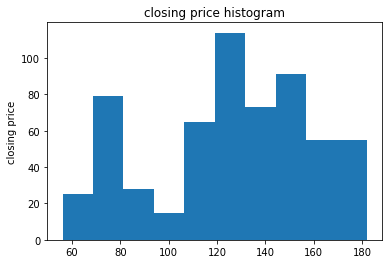

In [24]:
plt.hist(aapl["Close"])
plt.ylabel("closing price")
plt.title("closing price histogram");

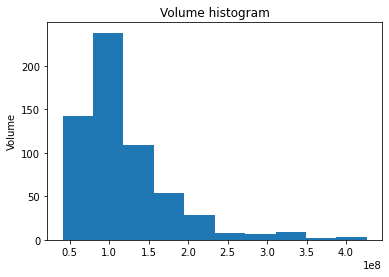

In [25]:
plt.hist(aapl["Volume"])
plt.ylabel("Volume")
plt.title("Volume histogram");

## check for outliers using boxplot

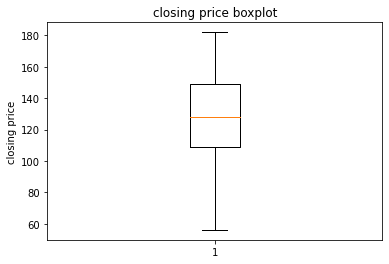

In [26]:

plt.boxplot(aapl["Close"])
plt.ylabel("closing price")
plt.title("closing price boxplot");



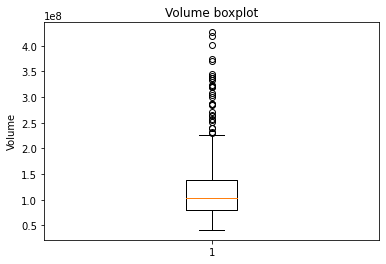

In [27]:
plt.boxplot(aapl["Volume"])
plt.ylabel("Volume")
plt.title("Volume boxplot");

## use lineplot to check trend

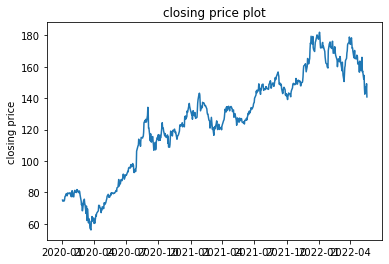

In [28]:
plt.plot(aapl["Close"])
plt.ylabel("closing price")
plt.title("closing price plot");
# closing price has an rising trend

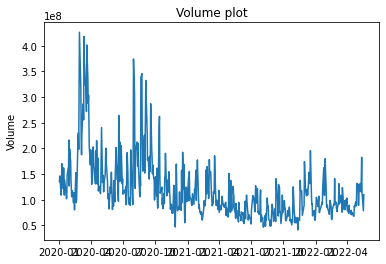

In [29]:
plt.plot(aapl["Volume"])
plt.ylabel("Volume")
plt.title("Volume plot");

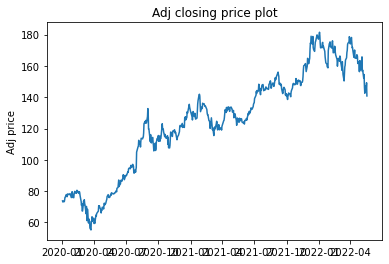

In [30]:
plt.plot(aapl["Adj Close"])
plt.ylabel("Adj price")
plt.title("Adj closing price plot");


adj close price has the same trend as the closing price, closing price merely refers to the cost of shares at the end of the day, the adjusted closing price considers other factors like dividends, stock splits, and new stock offerings

# ACF plot and PACF,to check for lags and what model to use in the arima model.

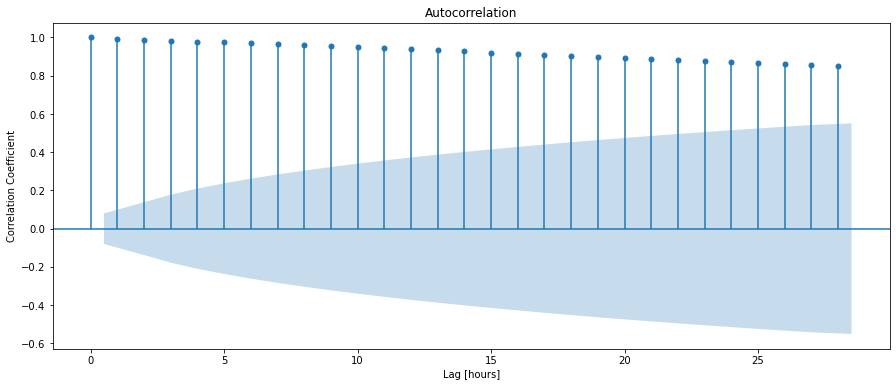

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(aapl["Close"],ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

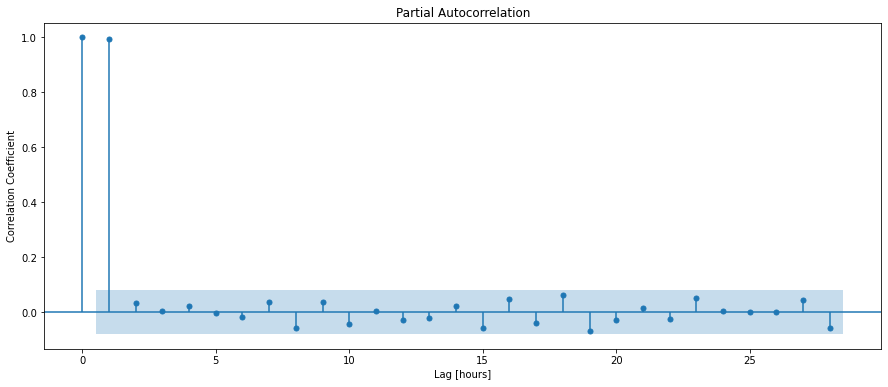

In [32]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(aapl["Close"],ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

# calculating returns

In [33]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)
daily_log_returns.fillna(0, inplace=True)

# Print daily log returns
daily_log_returns.head()


,Adj Close
Date,
2020-01-02,0.000000
2020-01-03,-0.009770
2020-01-06,0.007937
2020-01-07,-0.004714
2020-01-08,0.015958


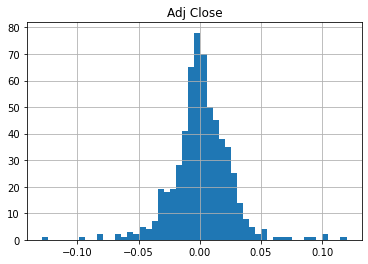

        Adj Close
count  600.000000
mean     0.001351
std      0.023378
min     -0.128647
25%     -0.009813
50%      0.000746
75%      0.014124
max      0.119808


In [34]:
# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

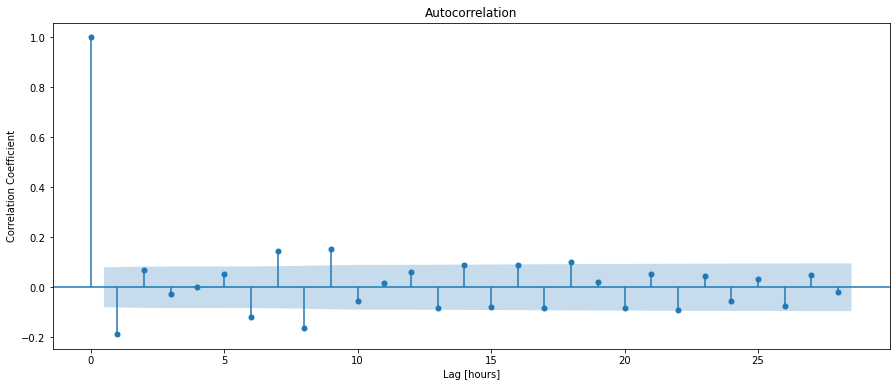

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(daily_log_returns,ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

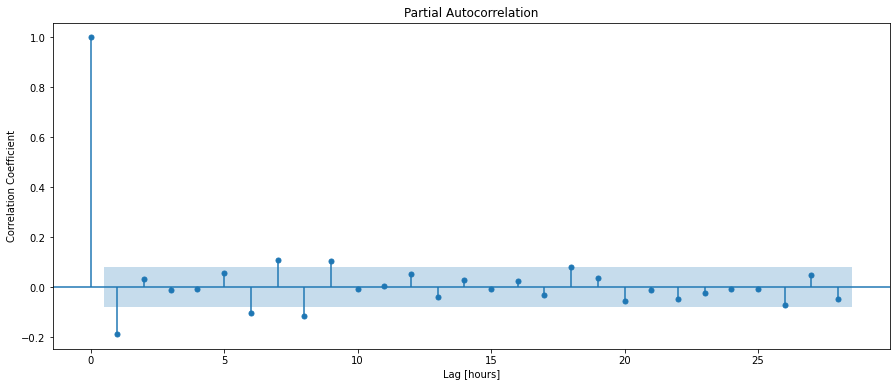

In [36]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(daily_log_returns,ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

In [37]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
Date                 
2020-01-02   1.000000
2020-01-03   0.990278
2020-01-06   0.998168
2020-01-07   0.993474
2020-01-08   1.009455
...               ...
2022-05-12   1.932076
2022-05-13   1.993740
2022-05-16   1.972463
2022-05-17   2.022608
2022-05-18   1.908494

[600 rows x 1 columns]


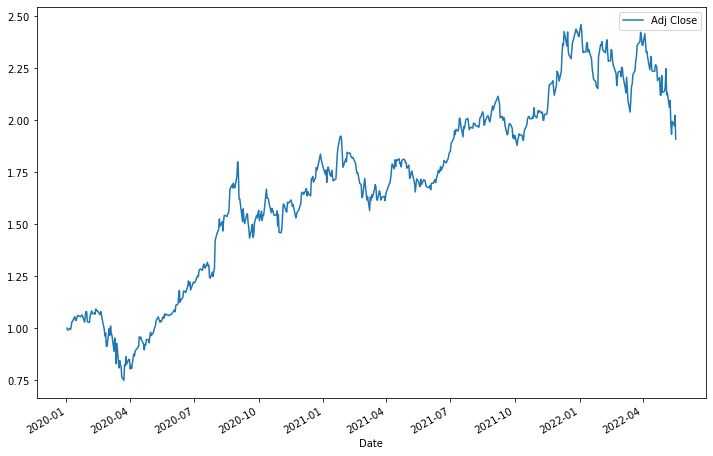

In [38]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

## Test the data for stationarity

Fitting an ARIMA model requires the series to be stationary. A series is said to be stationary when its mean, variance, and autocovariance are time invariant. Since ARIMA uses previous lags of series to model its behavior, modeling stable series with consistent properties involves less uncertainty.

In [39]:
result = adfuller(aapl["Close"])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.5424898239422133
p-value: 0.5123974049092843
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [40]:
# The augmented Dickey-Fuller (ADF) test is a formal statistical test for stationarity. The null hypothesis assumes that the series is non-stationary.
# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
# p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

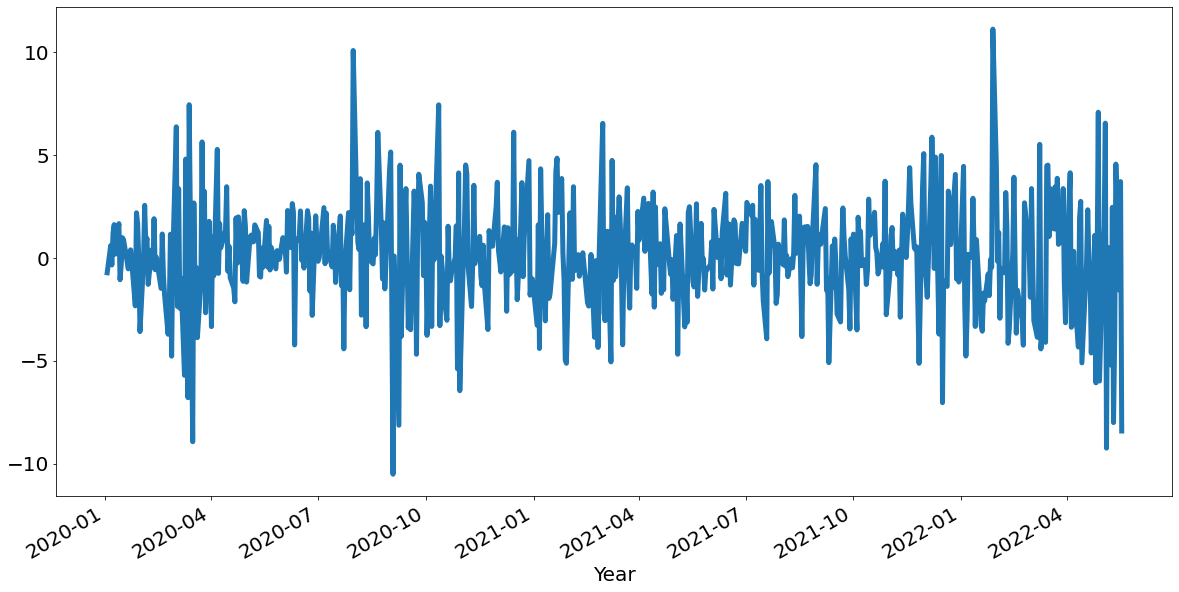

In [41]:
aapl["Close"].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

## Fit a Time Series mode
The statsmodels library provides the capability to fit an ARIMA model. An ARIMA model can be created using the statsmodels library as follows:

Define the model by calling ARIMA() and passing in the p, d, and q parameters. The model is prepared on the training data by calling the fit() function. Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.

Let’s start off with something simple. We will fit an ARIMA model to the entire dataset and review the residual errors.

In [42]:
# fit model
# order (p, d, q)
model = smapi.tsa.arima.ARIMA(daily_log_returns, order=(2,0,1))
results = model.fit()

In [43]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  600
Model:                 ARIMA(2, 0, 1)   Log Likelihood                1413.668
Date:                Sat, 21 May 2022   AIC                          -2817.336
Time:                        13:01:47   BIC                          -2795.351
Sample:                             0   HQIC                         -2808.778
                                - 600                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.298      0.194      -0.001       0.003
ar.L1         -0.4643      0.684     -0.679      0.497      -1.805       0.876
ar.L2         -0.0178      0.140     -0.127      0.8

## residuals analysis 

First, we get a line plot of the residual errors, suggesting that there may still be trend information not captured by the model.Next, we get a density plot of the residual error values, suggesting the errors are Gaussian.

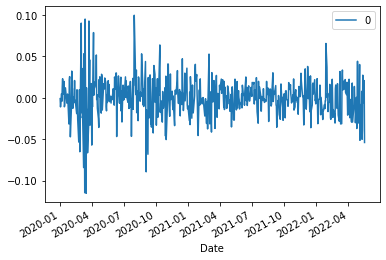

In [44]:
# plot residual errors
residuals = pd.DataFrame(results.resid)
residuals.plot();

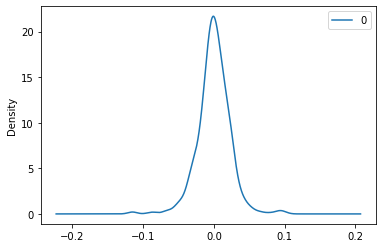

In [45]:
residuals.plot(kind='kde');

In [46]:
print(residuals.describe())

                0
count  600.000000
mean     0.000007
std      0.022954
min     -0.115462
25%     -0.011513
50%      0.000208
75%      0.012316
max      0.099649


When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

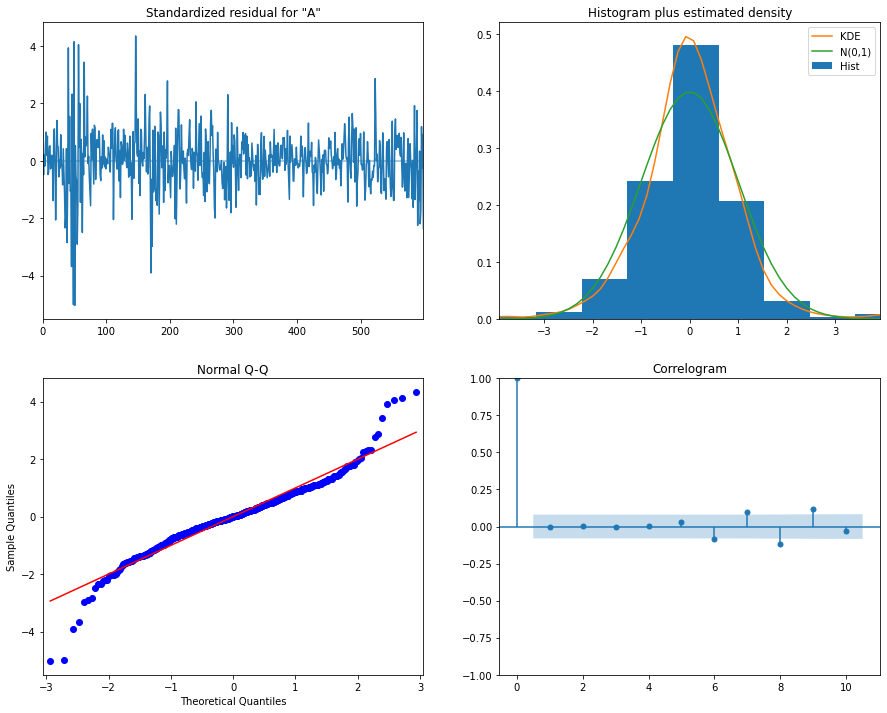

In [47]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Predict some future values.

In [48]:
pred = results.get_prediction(start=pd.to_datetime('2022-05-18'), dynamic=False)
pred_ci = pred.conf_int()

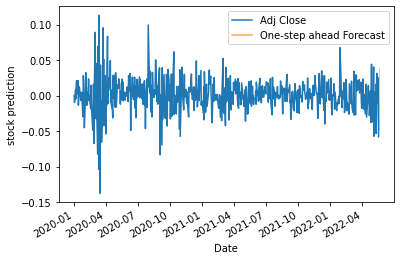

In [49]:
ax = daily_log_returns.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)


ax.set_xlabel('Date')
ax.set_ylabel('stock prediction')
plt.legend()

plt.show()

In [51]:
# Forecasts
aapl['y_forecasted'] = pred.predicted_mean
aapl['error_sq_2'] = (aapl["Close"] - pred.predicted_mean)**2
# Drop NAs and generate new DataFrame
df_pred = aapl["Close"].dropna()
# Sum of squared residuals (SS_R)
SS_R = aapl['error_sq_2'].sum()
# calculate mean squared error of the model:
# Number of obeservations (lenght of DataFrame)
n = len(aapl["error_sq_2"])
# calculate mse
mse = round((SS_R/(n-1)),2)
# print output
print('Mean squared error:', mse)

Mean squared error: 33.11


In [53]:
df_pred.tail(5)

Date
2022-05-12    142.559998
2022-05-13    147.110001
2022-05-16    145.539993
2022-05-17    149.240005
2022-05-18    140.820007
Name: Close, dtype: float64